# Practice 1 : Processing a Collection of Objects

So far, we have seen how to process and analyze a dataset composed of text files with Spark. We will now see through a the next exercises how to use it to process an arbitrary type of file dataset, in this case images.

We will work on the [Oxford Flowers](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) dataset. If you yet fetch it, the notebook [0-Configuration.ipynb](0-Configuration.ipynb) can assist you in downloading the files.

In [2]:
import os, glob

In [3]:
PATH = '../data/flowers/jpg/'
image_list = glob.glob(os.path.join(PATH, '*.jpg'))
image_list[:5]

['../data/flowers/jpg/image_0001.jpg',
 '../data/flowers/jpg/image_0002.jpg',
 '../data/flowers/jpg/image_0003.jpg',
 '../data/flowers/jpg/image_0004.jpg',
 '../data/flowers/jpg/image_0005.jpg']

The Python library [Pillow](https://python-pillow.github.io/) can help us read images. For example:

In [5]:
! pip install pillow

    100% |████████████████████████████████| 2.0MB 549kB/s ta 0:00:011


In [6]:
from PIL import Image

In [7]:
flower_image = Image.open(image_list[0])
flower_image.filename

'../data/flowers/jpg/image_0001.jpg'

To reduce the dimensions of an image, we can use the method `resize` which returns a new `PIL.image` object.

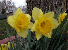

In [9]:
image_resized = flower_image.resize((flower_image.width//10, flower_image.height//10))
image_resized

This image can then be saved on disk using the method `save()`.

## Instructions

### 0. Import the necessary module to process data with Spark and create a Spark context if required

In [10]:
import pyspark
try:
    sc = pyspark.SparkContext()
except:
    pass

### 1. Create a RDD from the list of filenames `image_list`

In [11]:
rdd = sc.parallelize(image_list)

### 2. Create a second RDD that contains `PIL.Image`

In [12]:
image_rdd = rdd.map(lambda filename: (filename, Image.open(filename)))

### 3. Keep only the landscape images (`width > height`)

In [13]:
filter_images = image_rdd.filter(lambda x: x[1].width > x[1].height)

### 4. Count the number of landscape images

In [14]:
filter_images.count()

794

### 5. Reduce the dimensions of landscape images by a factor 5

In [15]:
red_landscapes = filter_images.mapValues(lambda x: x.resize((x.width // 5, x.height // 5)))

### 6. Verify the transformation by retrieving the first element

In [17]:
print(red_landscapes.first()[0])
red_landscapes.first()[1].size

../data/flowers/jpg/image_0001.jpg


(137, 100)

### 7. Save the new images as files

**Watch out**
* How to tell PIL where to save the files?
* How can we specify the name and the paths of our new files?
* Could a dataset of key-value pairs be useful?
* Is this an action or a transformation?

#### First, we need to create a new folder to save the files.

In [20]:
resized_path = '../data/flowers/jpg/resized'

In [21]:
try:
    os.mkdir(resized_path)
except FileExistsError:
    pass

#### Second, we need to design a function to save the image under a new path

In [22]:
def save_image(tuple_):
    image_path = tuple_[0]
    image = tuple_[1]
    
    # Set resized image's path
    image_name = os.path.basename(image_path)
    new_path = os.path.join(resized_path, image_name)
    
    # Save image
    image.save(new_path)

#### Finally, we apply the function to every element of the RDD.

In [23]:
red_landscapes.foreach(save_image)

#### We can verify the results by looking at the resized folder content

In [24]:
resized_image_list = glob.glob(os.path.join(resized_path, '*.jpg'))
len(resized_image_list)

794

### 8. End the application

In [25]:
sc.stop()

## Recap

In this notebook, we put in practice and learned about the following parts of 
**[Python Spark API](http://spark.apache.org/docs/latest/api/python/)**:
1. Import Spark Python module: 
**[`import pyspark`](http://spark.apache.org/docs/latest/api/python/pyspark.html)**
2. Create a SparkContext:
**[`pyspark.SparkContext()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.SparkContext)**
2. Create a RDD from a list of objects:
**[`SparkContext.parallelize(list)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.SparkContext.textFile)**
3. Count the number of elements in a RDD: 
**[`Rdd.count()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.count)**
4. Retrieve the first element of a RDD: 
**[`RDD.first()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.first)**
5. Apply a transformation on each element of a RDD:
**[`RDD.map(func)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.map)**
5. Filter a RDD:
**[`RDD.filter(func)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.filter)**
7. Apply a function to all elements of a RDD: 
**[`RDD.foreach()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.foreach)**
10. End the SparkContext:
**[`SparkContext.stop()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.SparkContext.stop)**